In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading Iris dataset 

In [221]:
data = pd.read_csv("Iris Dataset.csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Changing Species name into numeric values

In [222]:
data['Species'] = data['Species'].apply({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}.get)
data.head(2)
y_actual = data.Species

In [223]:
df = pd.DataFrame({
    'x': data.SepalLengthCm,
    'y': data.SepalWidthCm,
    'cluster': data.Species
})
x_train = pd.DataFrame({
    'x': data.SepalLengthCm,
    'y': data.SepalWidthCm
})

Defining colours for each species 

In [224]:
colmap = {0: 'r', 1: 'g', 2: 'b'}   

This method assigns each datapoint into one of of the three clusters corresponding to each species

In [225]:
def assignment(df, centroid):
    for i in range(3):
        df['distance_from_{}'.format(i)] = (np.sqrt((df['x'] - centroid[i][0])**2 + (df['y'] - centroid[i][1])**2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroid.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df


This method updates the centroid for all clusters once all the data points have been assigned to one of the clusters and returns the updated clusters

In [226]:
def update_centroids(list, X):
    for i in range(3):
        list[i][0] = np.mean(X[X['closest'] == i]['x'])
        list[i][1] = np.mean(X[X['closest'] == i]['y'])
    return list

This method implements the K means clustering algorithm and takes arguments as list of all data points, number of clusters and initially defined centroids

In [227]:
def kmean(X, K, centroid_list):
    X = assignment(X, centroid_list)
    centroid_list = update_centroids(centroid_list, X)
    while True:
        closest = X['closest'].copy(deep=True)
        centroid_list = update_centroids(centroid_list,X)
        X = assignment(X, centroid_list)
        if closest.equals(X['closest']):
            break
    return X 
    


Defining intial centroids as the mean of values corresponding to each species

In [228]:
centres = {}
for i in range(3):
    list = []
    list.append(df.loc[df['cluster'] == i]['x'].mean())
    list.append(df.loc[df['cluster'] == i]['y'].mean())
    centres[i] = list
centres

{0: [5.006, 3.418],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

In [229]:
x_predicted = kmean(x_train, 3, centres)
y_predicted = x_predicted['closest']

This method compares the output predicted by k means algorithm to the actual dataset and returns accuracy in percentage

In [230]:
def compare(y_pred, y_test):
    count = 0
    for i in y_test.index:
        if y_pred[i] == y_test.loc[i]:
            count = count +1
    return count*100/len(y_pred)

In [231]:
Accuracy = compare(y_predicted, y_actual)
print("Accuracy:", Accuracy, "%")

Accuracy: 82.0 %


Plotting real dataset

Text(0, 0.5, 'Sepal Width')

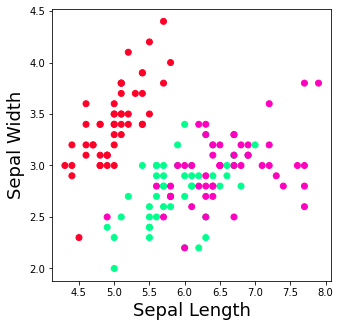

In [232]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c = df['cluster'],cmap = 'gist_rainbow')
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

Plotting predicted clusters

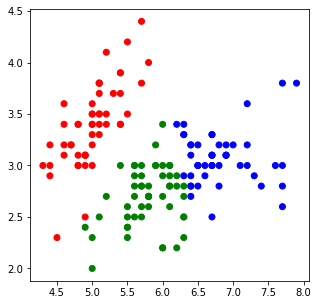

In [233]:
fig = plt.figure(figsize=(5,5))

plt.scatter(x_predicted['x'],x_predicted['y'], color = x_predicted['color'], alpha=1)
plt.show()